## Step 3 - Climate Analysis and Exploration

You are now ready to use Python and SQLAlchemy to do basic climate analysis and data exploration on your new weather station tables. All of the following analysis should be completed using SQLAlchemy ORM queries, Pandas, and Matplotlib.

* Create a Jupyter Notebook file called `climate_analysis.ipynb` and use it to complete your climate analysis and data exporation.

* Choose a start date and end date for your trip. Make sure that your vacation range is approximately 3-15 days total.

* Use SQLAlchemy `create_engine` to connect to your sqlite database.

* Use SQLAlchemy `automap_base()` to reflect your tables into classes and save a reference to those classes called `Station` and `Measurement`.


In [161]:
# Dependencies
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
# Import SQLAlchemy  and other dependencies
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, inspect, func
from sqlalchemy.ext.declarative import declarative_base





In [162]:
# Create Database Connection
# Import and establish Base for which classes will be constructed 
# Declare a Base using `automap_base()`

engine = create_engine('sqlite:///hawaii.sqlite')



In [163]:
# 
Base = automap_base()

In [164]:
# Use the Base class to reflect the database tables
Base.prepare(engine, reflect=True)

In [165]:
session = Session(bind = engine)

In [166]:
# Print all of the classes mapped to the Base
Base.classes.keys()

['clean_measurements',
 'clean_stations',
 'measurement',
 'measurements',
 'station',
 'stations']

In [167]:
# Create the inspector and connect it to the engine
inspector = inspect(engine)

In [168]:
# Collect the names of tables within the database
inspector.get_table_names()

['clean_measurements',
 'clean_stations',
 'measurement',
 'measurements',
 'station',
 'stations']

In [169]:
#Query class
Measurement = Base.classes.measurement
Station = Base.classes.station

In [170]:
# start session
session = Session(engine)

In [171]:
#Get all dates
dates = session.query(Measurement.date).all()

In [172]:
#Get all prcp
prcp = session.query(Measurement.prcp).all()

In [173]:
#find last date to collect 12 months of data
session.query(Measurement.date).order_by(Measurement.date.desc()).first()

('2017-08-23')

In [174]:
#variables for collecting one yearof data
start_year = '2016-08-23'
end_year = '2017-08-23'

In [175]:
#one year query
year_prcp = session.query(Measurement.date, Measurement.prcp).filter(Measurement.date>= start_year).filter(Measurement.date<= end_year).all()

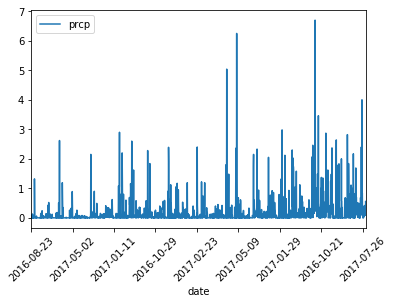

In [176]:
# One year plot
df_prcp = pd.DataFrame(year_prcp, columns = ['date', 'prcp'])
df_prcp.set_index('date', inplace=True)
df_prcp.plot(x_compat=True)
plt.xticks(rotation='45')
plt.savefig('year_prcp.png')

In [177]:
#one year stats
df_prcp.describe()

,prcp
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


In [182]:
#number of stations
session.query(func.count(Station.station)).all()

[(9)]

In [183]:
#number of readings compared to stations
session.query(Measurement.station,func.count(Measurement.station)
             ).group_by(Measurement.station
                       ).order_by(func.count(Measurement.station
                                                                ).desc()).all()

[('USC00519281', 2772),
 ('USC00513117', 2696),
 ('USC00519397', 2685),
 ('USC00519523', 2572),
 ('USC00516128', 2484),
 ('USC00514830', 1937),
 ('USC00511918', 1932),
 ('USC00517948', 683),
 ('USC00518838', 342)]

In [184]:
#Query and filter for the station with the highest number of recordings 
station_recording = session.query(Measurement.tobs).filter(Measurement.date >= start_year
                                                     ).filter(Measurement.date <= end_year
                                                             ).filter(Measurement.station == 'USC00519281').all()

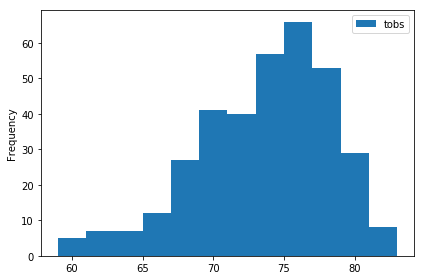

In [185]:
#histogram of the highest reporting station
df_station_record= pd.DataFrame(station_recording, columns=['tobs'])
df_station_record.plot.hist(bins=12)
plt.tight_layout()
plt.savefig('station_tobs.png')

In [198]:
import datetime as dt

vac_start = dt.datetime(2016,12,22)
vac_end = dt.datetime(2017, 1, 5)

In [199]:
# create a function to find the min, max, and average temperatures for your chosen vacation dates
def calc_temps(start_date = dt.datetime(2016,12,22),end_date = dt.datetime(2017, 1, 5)):
    results = session.query(func.min(Measurement.tobs),func.max(Measurement.tobs),func.avg(Measurement.tobs)).filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()
    return results[0]

In [200]:
# create a list for plotting
temps_list = list(calc_temps(vac_start,vac_end))
temps_list


[62.0, 78.0, 70.42307692307692]

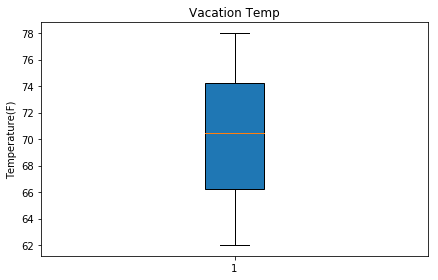

In [201]:
#create plot
fig, ax = plt.subplots()

x = range(len(temps_list))
ax.boxplot(temps_list, patch_artist=True)
ax.set_title('Vacation Temp')
fig.tight_layout()
plt.ylabel('Temperature(F)')
plt.savefig('vac_temps.png')